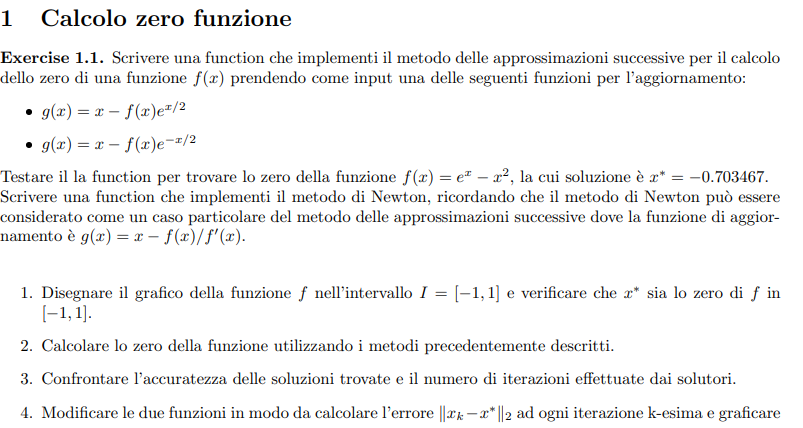

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1
# Function approssimazioni successive
def succ_app(f, g, tolf, tolx, maxit, xTrue, x0=0):
  i = 0
  err = np.zeros(maxit+1, dtype=np.float64)
  err[0] = tolx+1
  vecErrore = np.zeros(maxit+1, dtype=np.float64)
  vecErrore[0] = np.abs(x0 - xTrue)
  x = x0

  while ((np.abs(f(x)) > tolf or err[i] > tolx) and i < maxit):
    x_new = g(x)
    err[i+1] = np.abs(x_new - x) # scarto assoluto tra iterati
    vecErrore[i+1] = np.abs(x_new - xTrue)
    i = i+1
    x = x_new
  err=err[0:i]
  vecErrore = vecErrore[0:i]
  return (x, i, err, vecErrore)

def newton(f, df, tolf, tolx, maxit, xTrue, x0=0):
    g = lambda x: x-f(x)/df(x)
    (x, i, err, vecErrore) = succ_app(f, g, tolf, tolx, maxit, xTrue, x0)
    return (x, i, err, vecErrore)

f = lambda x: np.exp(x)-x**2
df = lambda x: np.exp(x)-2*x
g1 = lambda x: x-f(x)*np.exp(x/2)
g2 = lambda x: x-f(x)*np.exp(-x/2)

xTrue = -0.703467
fTrue = f(xTrue)
print('fTrue = ', fTrue)

fTrue =  8.035078391532835e-07


Metodo approssimazioni successive g1 
 x = -0.7034674225096886 
 iter_new= 23
Metodo approssimazioni successive g2 
 x = -0.48775858993453886 
 iter_new= 100
Metodo Newton 
 x = -0.7034674224983917 
 iter_new= 6


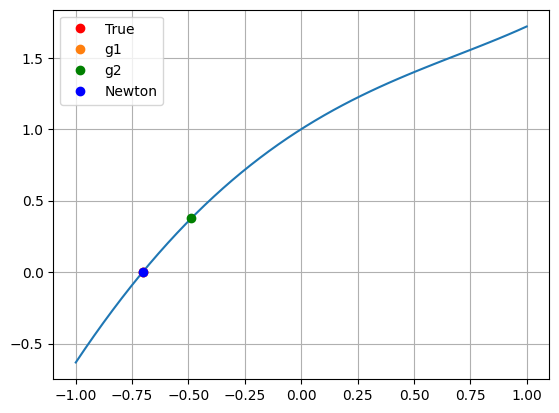

In [10]:
xplot = np.linspace(-1, 1)
fplot = f(xplot)

plt.plot(xplot,fplot)
plt.plot(xTrue,fTrue, 'or', label='True')

tolx= 10**(-10)
tolf = 10**(-6)
maxit=100
x0= 0

[sol_g1, iter_g1, err_g1, vecErrore_g1]=succ_app(f, g1, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g1 \n x =',sol_g1,'\n iter_new=', iter_g1)

plt.plot(sol_g1,f(sol_g1), 'o', label='g1')

[sol_g2, iter_g2, err_g2, vecErrore_g2]=succ_app(f, g2, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g2 \n x =',sol_g2,'\n iter_new=', iter_g2)

plt.plot(sol_g2,f(sol_g2), 'og', label='g2')

[sol_newton, iter_newton, err_newton, vecErrore_newton]=newton(f, df, tolf, tolx, maxit, xTrue, x0)
print('Metodo Newton \n x =',sol_newton,'\n iter_new=', iter_newton)

plt.plot(sol_newton,f(sol_newton), 'ob', label='Newton')
plt.legend()
plt.grid()
plt.show()

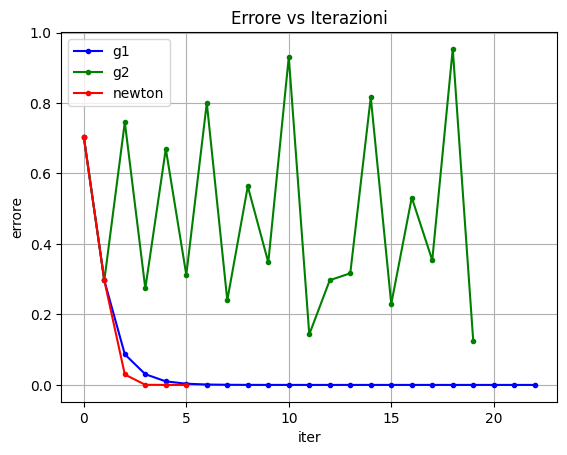

In [11]:
# GRAFICO Errore vs Iterazioni

# g1
plt.plot(vecErrore_g1, '.-', color='blue')
# g2
plt.plot(vecErrore_g2[:20], '.-', color='green')
# Newton
plt.plot(vecErrore_newton, '.-', color='red')

plt.legend( ("g1", "g2", "newton"))
plt.xlabel('iter')
plt.ylabel('errore')
plt.title('Errore vs Iterazioni')
plt.grid()
plt.show()

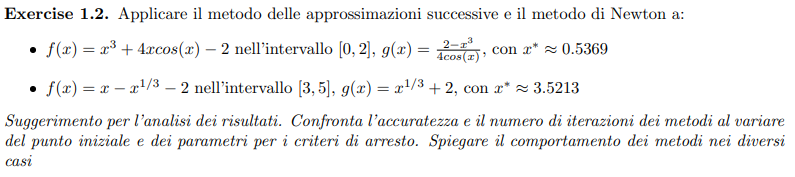

fTrue =  1.4366462846027162e-06
Metodo approssimazioni successive g1 
 x = 0.5368385515659326 
 iter_new= 10 
f:  -2.7002844404933057e-12
Metodo Newton 
 x = 0.5368385515667755 
 iter_new= 5 
f:  0.0


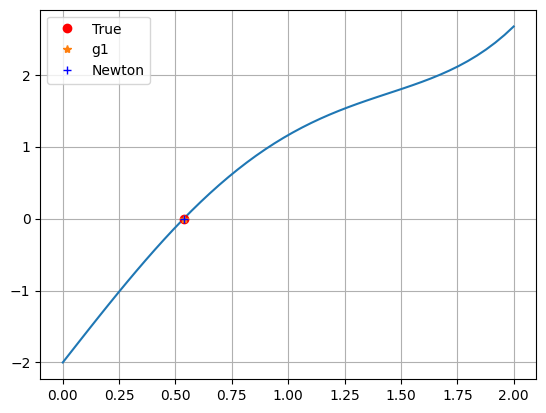

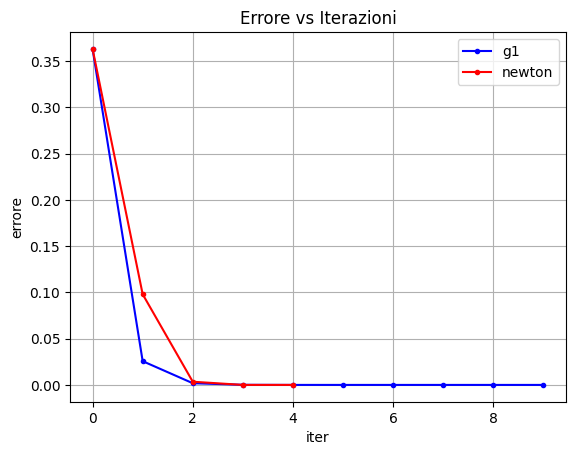

In [12]:
# Esercizio 2.1
f = lambda x: x**3+4*x*np.cos(x)-2
df = lambda x: 3*x**2+4*(np.cos(x) + x*-np.sin(x))
g1 = lambda x: (2-x**3)/(4*np.cos(x)) # va a zero con il denominatore!

xTrue = 0.536839
fTrue = f(xTrue)
print('fTrue = ', fTrue)

xplot = np.linspace(0, 2)
fplot = f(xplot)

plt.plot(xplot,fplot)
plt.plot(xTrue,fTrue, 'or', label='True')

tolx= 10**(-10)
tolf = 10**(-6)
maxit=100
x0= 0.9

[sol_g1, iter_g1, err_g1, vecErrore_g1] = succ_app(f, g1, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g1 \n x =',sol_g1,'\n iter_new=', iter_g1, '\nf: ', f(sol_g1))

plt.plot(sol_g1,f(sol_g1), '*', label='g1')

[sol_newton, iter_newton, err_newton, vecErrore_newton]=newton(f, df, tolf, tolx, maxit, xTrue, x0)
print('Metodo Newton \n x =',sol_newton,'\n iter_new=', iter_newton, '\nf: ', f(sol_newton))

plt.plot(sol_newton,f(sol_newton), '+b', label='Newton')
plt.grid()
plt.legend()
plt.show()

# GRAFICO Errore vs Iterazioni

# g1
plt.plot(vecErrore_g1, '.-', color='blue')
# Newton
plt.plot(vecErrore_newton, '.-', color='red')

plt.legend( ("g1", "newton"))
plt.xlabel('iter')
plt.ylabel('errore')
plt.title('Errore vs Iterazioni')
plt.grid()
plt.show()

fTrue =  1.4366462846027162e-06
Metodo approssimazioni successive g1 
 x = nan 
 iter_new= 10 
f:  nan
Metodo Newton 
 x = 0.5368385515667755 
 iter_new= 6 
f:  0.0


<ipython-input-13-9dc53004a92b>:2: RuntimeWarning: overflow encountered in double_scalars
  f = lambda x: x**3+4*x*np.cos(x)-2
<ipython-input-13-9dc53004a92b>:4: RuntimeWarning: overflow encountered in double_scalars
  g1 = lambda x: (2-x**3)/(4*np.cos(x))
<ipython-input-13-9dc53004a92b>:2: RuntimeWarning: invalid value encountered in cos
  f = lambda x: x**3+4*x*np.cos(x)-2
<ipython-input-13-9dc53004a92b>:4: RuntimeWarning: invalid value encountered in cos
  g1 = lambda x: (2-x**3)/(4*np.cos(x))


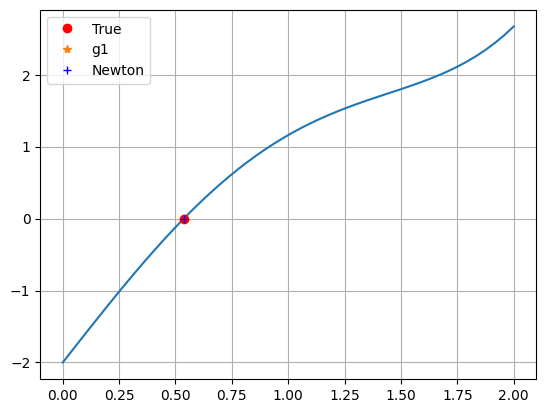

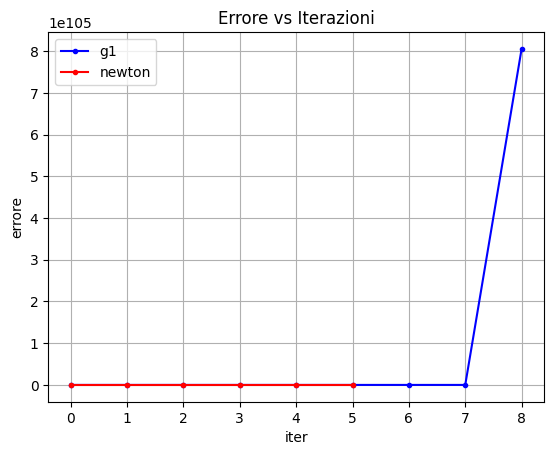

In [13]:
# Esercizio 2.1
f = lambda x: x**3+4*x*np.cos(x)-2
df = lambda x: 3*x**2+4*(np.cos(x) + x*-np.sin(x))
g1 = lambda x: (2-x**3)/(4*np.cos(x))

xTrue = 0.536839
fTrue = f(xTrue)
print('fTrue = ', fTrue)

xplot = np.linspace(0, 2)
fplot = f(xplot)

plt.plot(xplot,fplot)
plt.plot(xTrue,fTrue, 'or', label='True')

tolx= 10**(-10)
tolf = 10**(-6)
maxit=100
x0 = 1.4

[sol_g1, iter_g1, err_g1, vecErrore_g1] = succ_app(f, g1, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g1 \n x =',sol_g1,'\n iter_new=', iter_g1, '\nf: ', f(sol_g1))

plt.plot(sol_g1,f(sol_g1), '*', label='g1')

[sol_newton, iter_newton, err_newton, vecErrore_newton]=newton(f, df, tolf, tolx, maxit, xTrue, x0)
print('Metodo Newton \n x =',sol_newton,'\n iter_new=', iter_newton, '\nf: ', f(sol_newton))

plt.plot(sol_newton,f(sol_newton), '+b', label='Newton')
plt.grid()
plt.legend()
plt.show()

# GRAFICO Errore vs Iterazioni

# g1
plt.plot(vecErrore_g1, '.-', color='blue')
# Newton
plt.plot(vecErrore_newton, '.-', color='red')

plt.legend( ("g1", "newton"))
plt.xlabel('iter')
plt.ylabel('errore')
plt.title('Errore vs Iterazioni')
plt.grid()
plt.show()

fTrue =  1.4366462846027162e-06
Metodo approssimazioni successive g1 
 x = 15321.146849032619 
 iter_new= 5 
f:  3596448276675.797
Metodo Newton 
 x = 0.5368385515667755 
 iter_new= 5 
f:  0.0


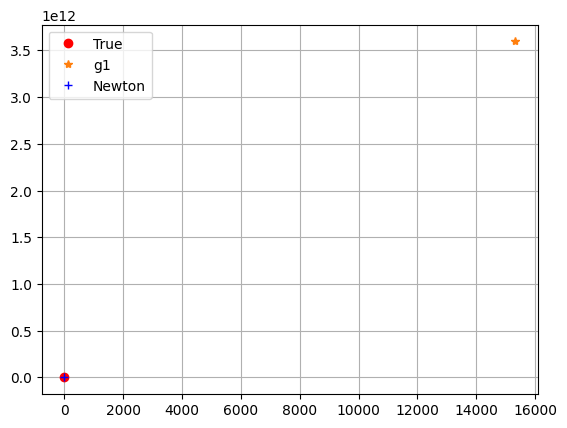

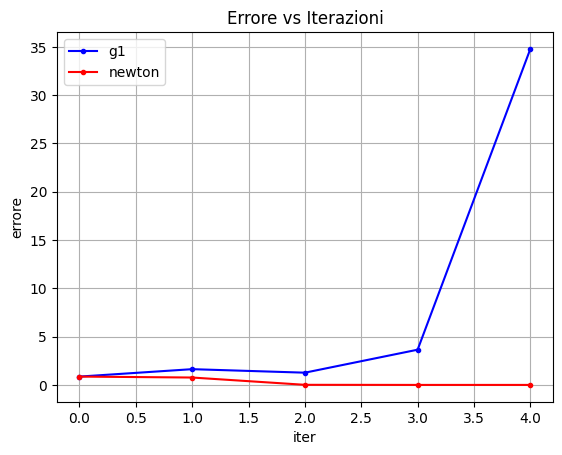

In [17]:
# Esercizio 2.1
f = lambda x: x**3+4*x*np.cos(x)-2
df = lambda x: 3*x**2+4*(np.cos(x) + x*-np.sin(x))
g1 = lambda x: (2-x**3)/(4*np.cos(x))

xTrue = 0.536839
fTrue = f(xTrue)
print('fTrue = ', fTrue)

xplot = np.linspace(0, 2)
fplot = f(xplot)

plt.plot(xplot,fplot)
plt.plot(xTrue,fTrue, 'or', label='True')

tolx= 10**(-10)
tolf = 10**(-6)
maxit=5
x0 = 1.4

[sol_g1, iter_g1, err_g1, vecErrore_g1] = succ_app(f, g1, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g1 \n x =',sol_g1,'\n iter_new=', iter_g1, '\nf: ', f(sol_g1))

plt.plot(sol_g1,f(sol_g1), '*', label='g1')

[sol_newton, iter_newton, err_newton, vecErrore_newton]=newton(f, df, tolf, tolx, maxit, xTrue, x0)
print('Metodo Newton \n x =',sol_newton,'\n iter_new=', iter_newton, '\nf: ', f(sol_newton))

plt.plot(sol_newton,f(sol_newton), '+b', label='Newton')
plt.grid()
plt.legend()
plt.show()

# GRAFICO Errore vs Iterazioni

# g1
plt.plot(vecErrore_g1, '.-', color='blue')
# Newton
plt.plot(vecErrore_newton, '.-', color='red')

plt.legend( ("g1", "newton"))
plt.xlabel('iter')
plt.ylabel('errore')
plt.title('Errore vs Iterazioni')
plt.grid()
plt.show()

fTrue =  -6.822785407889498e-05
Metodo approssimazioni successive g1 
 x = 3.521379706809784 
 iter_new= 13 
f:  4.46531700504238e-12
Metodo Newton 
 x = 3.521379706804568 
 iter_new= 4 
f:  0.0


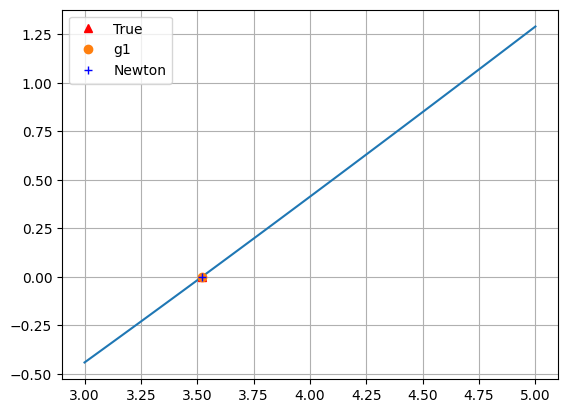

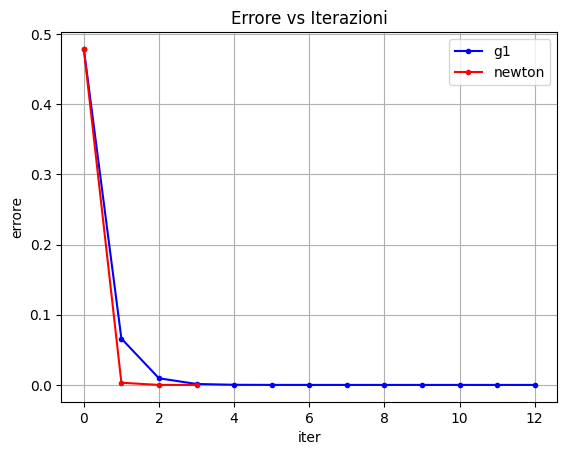

In [15]:
# Esercizio 2.2
f = lambda x: x-x**(1/3)-2
df = lambda x: 1-1/(3*x**(2/3))
g1 = lambda x: x**(1/3)+2

xTrue = 3.5213
fTrue = f(xTrue)
print('fTrue = ', fTrue)

xplot = np.linspace(3, 5)
fplot = f(xplot)

plt.plot(xplot,fplot)
plt.plot(xTrue,fTrue, '^r', label='True')

tolx= 10**(-10)
tolf = 10**(-6)
maxit=100
x0= 4

[sol_g1, iter_g1, err_g1, vecErrore_g1]=succ_app(f, g1, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g1 \n x =',sol_g1,'\n iter_new=', iter_g1, '\nf: ', f(sol_g1))

plt.plot(sol_g1,f(sol_g1), 'o', label='g1')

[sol_newton, iter_newton, err_newton, vecErrore_newton]=newton(f, df, tolf, tolx, maxit, xTrue, x0)
print('Metodo Newton \n x =',sol_newton,'\n iter_new=', iter_newton, '\nf: ', f(sol_newton))

plt.plot(sol_newton,f(sol_newton), '+b', label='Newton')
plt.grid()
plt.legend()
plt.show()

# GRAFICO Errore vs Iterazioni

# g1
plt.plot(vecErrore_g1, '.-', color='blue')
# Newton
plt.plot(vecErrore_newton, '.-', color='red')

plt.legend( ("g1", "newton"))
plt.xlabel('iter')
plt.ylabel('errore')
plt.title('Errore vs Iterazioni')
plt.grid()
plt.show()

fTrue =  -6.822785407889498e-05
Metodo approssimazioni successive g1 
 x = 3.5213804685200154 
 iter_new= 8 
f:  6.520180719782331e-07
Metodo Newton 
 x = 3.521379710620397 
 iter_new= 3 
f:  3.266297898818493e-09


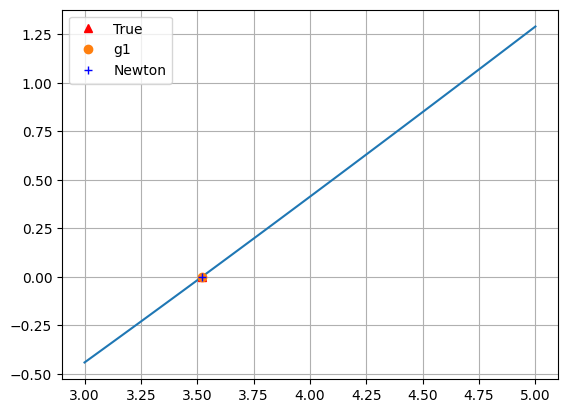

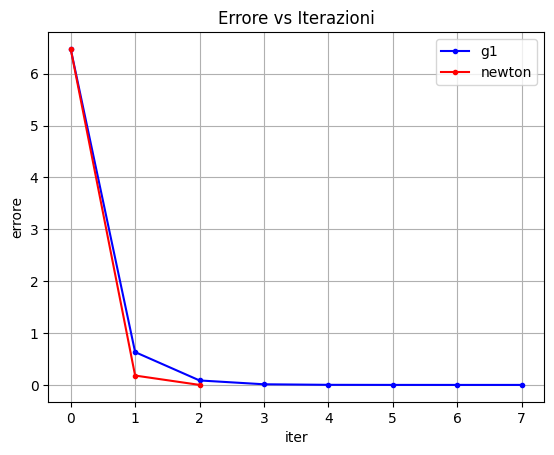

In [20]:
# Esercizio 2.2
f = lambda x: x-x**(1/3)-2
df = lambda x: 1-1/(3*x**(2/3))
g1 = lambda x: x**(1/3)+2

xTrue = 3.5213
fTrue = f(xTrue)
print('fTrue = ', fTrue)

xplot = np.linspace(3, 5)
fplot = f(xplot)

plt.plot(xplot,fplot)
plt.plot(xTrue,fTrue, '^r', label='True')

tolx= 10**(-1)
tolf = 10**(-6)
maxit=100
x0= 10

[sol_g1, iter_g1, err_g1, vecErrore_g1]=succ_app(f, g1, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g1 \n x =',sol_g1,'\n iter_new=', iter_g1, '\nf: ', f(sol_g1))

plt.plot(sol_g1,f(sol_g1), 'o', label='g1')

[sol_newton, iter_newton, err_newton, vecErrore_newton]=newton(f, df, tolf, tolx, maxit, xTrue, x0)
print('Metodo Newton \n x =',sol_newton,'\n iter_new=', iter_newton, '\nf: ', f(sol_newton))

plt.plot(sol_newton,f(sol_newton), '+b', label='Newton')
plt.grid()
plt.legend()
plt.show()

# GRAFICO Errore vs Iterazioni

# g1
plt.plot(vecErrore_g1, '.-', color='blue')
# Newton
plt.plot(vecErrore_newton, '.-', color='red')

plt.legend( ("g1", "newton"))
plt.xlabel('iter')
plt.ylabel('errore')
plt.title('Errore vs Iterazioni')
plt.grid()
plt.show()